In [1]:
pip install pycrypto

     |████████████████████████████████| 446 kB 8.9 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=5bae57c44eb96128cb11e1dddf12e0c3947eb54762f1070a61de9bf26c944475
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [2]:
from random import randrange, getrandbits
from Crypto.Util import number
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline
import numpy as np
import random

**Generating Two Prime Numbers P and Q and Public Key**

In [3]:
def GCD(a,b):
    if a==0:
      return b;
    return GCD(b%a,a)

In [4]:
n_k=[]
n_bit=[4,5,6,7,8,9,10,11,12,13,14,16,24,32,64,128,256,512,1024,2048]
eu=[]
e_k=[]
prime=[(number.getPrime(4),number.getPrime(4)),(number.getPrime(5),number.getPrime(5)),(number.getPrime(6),number.getPrime(6)),(number.getPrime(7),number.getPrime(7)),(number.getPrime(8),number.getPrime(8)),(number.getPrime(9),number.getPrime(9)),(number.getPrime(10),number.getPrime(10)),(number.getPrime(11),number.getPrime(11)),(number.getPrime(12),number.getPrime(12)),(number.getPrime(13),number.getPrime(13)),(number.getPrime(14),number.getPrime(14)),(number.getPrime(16),number.getPrime(16)),(number.getPrime(24),number.getPrime(24)),(number.getPrime(32),number.getPrime(32)),(number.getPrime(64),number.getPrime(64)),(number.getPrime(128),number.getPrime(128)),(number.getPrime(256),number.getPrime(256)),(number.getPrime(512),number.getPrime(512)),(number.getPrime(1024),number.getPrime(1024)),(number.getPrime(2048),number.getPrime(2048))]
for num in range(len(prime)):
  N=prime[num][0]*prime[num][1]
  n_k.append(N)
  eulerTotient=(prime[num][0]-1)*(prime[num][1]-1)
  eu.append(eulerTotient)
  for e in range(3,eulerTotient,2):
    if GCD(e,eulerTotient)==1:
        e_k.append(e)
        break

**General Method to find Private Key**

In [6]:
exec_1=[]
private_key_gm=[]
d_k=[]
for i in range(len(prime[:12])):
  start_time_1=time.time()
  d=1
  while(True):
    if((d*e_k[i])%eu[i]==1):
      break
    d+=1
  execute_1=time.time()-start_time_1
  private_key_gm.append(d)
  exec_1.append(execute_1)

**EXTENDED EUCLIDEAN ALGORITHM FOR PRIVATE KEY**

In [7]:
exec_2=[]
private_key_ee=[]
for i in range(len(prime)):
  start_time_2=time.time()
  a1,a2,b1,b2,d1,d2=1,0,0,1,eu[i],e_k[i]
  while d2!=1:
    k=(d1//d2)
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    temp=b2
    b2=b1-(b2*k)
    b1=temp

    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2
    
  if D>eu[i]:
    D=D%eu[i]
  elif D<0:
    D=D+eu[i]
  private_key_ee.append(D)
  execute_2=time.time()-start_time_2
  exec_2.append(execute_2)

In [8]:
print('The Execution Time For General Method :')
exec_1

The Execution Time For General Method :


[4.363059997558594e-05,
 6.842613220214844e-05,
 0.00034499168395996094,
 0.0026540756225585938,
 0.005994558334350586,
 0.005818367004394531,
 0.08172273635864258,
 0.505734920501709,
 1.347353219985962,
 11.777788400650024,
 39.6921021938324,
 444.4273293018341]

In [9]:
print('The Execution Time For Extended Euclidean Algorithm :')
exec_2

The Execution Time For Extended Euclidean Algorithm :


[7.867813110351562e-06,
 5.7220458984375e-06,
 3.337860107421875e-06,
 3.814697265625e-06,
 3.814697265625e-06,
 3.337860107421875e-06,
 3.337860107421875e-06,
 2.384185791015625e-06,
 2.6226043701171875e-06,
 1.9073486328125e-06,
 2.1457672119140625e-06,
 4.76837158203125e-06,
 3.5762786865234375e-06,
 4.5299530029296875e-06,
 2.86102294921875e-06,
 5.9604644775390625e-06,
 4.5299530029296875e-06,
 4.0531158447265625e-06,
 5.4836273193359375e-06,
 6.67572021484375e-06]

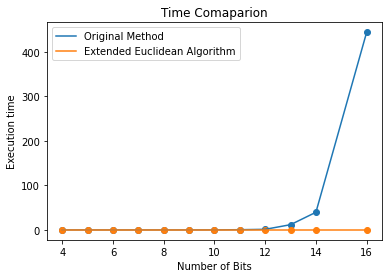

In [10]:
plt.plot(n_bit[:12],exec_1[:12],label='Original Method')
plt.plot(n_bit[:12], exec_2[:12],label='Extended Euclidean Algorithm')
plt.scatter(n_bit[:12], exec_1[:12])
plt.scatter(n_bit[:12], exec_2[:12])
plt.xlabel('Number of Bits')
plt.ylabel('Execution time')
plt.title('Time Comaparion')
plt.legend()
plt.show()

In [11]:
eff=[]
k=0
for i in range(0,len(n_bit[:12])):
  k=((exec_1[i]-exec_2[i])/(exec_1[i]))*100
  eff.append(k)
e=sum(eff)/len(eff)
print('The Average Efficiency Calculated For Random Prime Number : {}'.format(e))

The Average Efficiency Calculated For Random Prime Number : 97.69731818448513


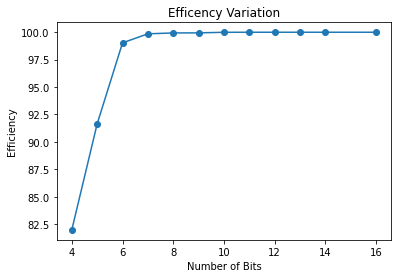

In [12]:
plt.plot(n_bit[:12],eff)
plt.scatter(n_bit[:12],eff)
plt.xlabel('Number of Bits')
plt.ylabel('Efficiency')
plt.title('Efficency Variation')
plt.show()

In [13]:
for i in n_bit[12:]:
  exec_1.append('Unresponsive')
  eff.append('Null')

In [14]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Number of Bits','Extended Euclidean','General Method','Efficiency']
for i in range(len(n_bit)):
  x.add_row([n_bit[i],exec_2[i],exec_1[i],eff[i]])
x.add_row(['','Average Time ='+str(sum(exec_2)/len(exec_2))+' s','Average Time ='+str(sum(exec_1[:12])/len(exec_1[:12]))+' s','Average Efficiency ='+str(e)+'%'])
print(x)

+----------------+--------------------------------------+-----------------------------------+----------------------------------------+
| Number of Bits |          Extended Euclidean          |           General Method          |               Efficiency               |
+----------------+--------------------------------------+-----------------------------------+----------------------------------------+
|       4        |        7.867813110351562e-06         |       4.363059997558594e-05       |            81.9672131147541            |
|       5        |         5.7220458984375e-06          |       6.842613220214844e-05       |           91.63763066202091            |
|       6        |        3.337860107421875e-06         |       0.00034499168395996094      |            99.0324809951624            |
|       7        |          3.814697265625e-06          |       0.0026540756225585938       |           99.85627021200145            |
|       8        |          3.814697265625e-06         